In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns             
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [229]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
#讀入資料
df.rename(columns={'Customer Lifetime Value':'Customer_Lifetime_Value',
                   "Effective To Date":"Effective_To_Date",
                   "Location Code":"Location_Code",
                   "Marital Status":"Marital_Status",
                   "Monthly Premium Auto":"Monthly_Premium_Auto",
                   "Months Since Last Claim":"Months_Since_Last_Claim",
                   "Months Since Policy Inception":"Months_Since_Policy_Inception",
                   "Number of Open Complaints":"Number_of_Open_Complaints",
                   "Number of Policies":"Number_of_Policies",
                   "Policy Type":"Policy_Type","Renew Offer Type":"Renew_Offer_Type",
                   "Sales Channel":"Sales_Channel",
                   "Total Claim Amount":"Total_Claim_Amount",
                   "Vehicle Class":"Vehicle_Class","Vehicle Size":"Vehicle_Size"}, inplace=True)
#將所有有名稱空格的資料進行處理




In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer_Lifetime_Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective_To_Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location_Code                  9134 non-null   object 
 11  Marital_Status                 9134 non-null   object 
 12  Monthly_Premium_Auto           9134 non-null   i

In [231]:
df = df.drop(columns=['Effective_To_Date','Customer','Coverage',
                      'Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception',
                     'Number_of_Policies','Policy_Type','Policy','Renew_Offer_Type','Total_Claim_Amount'])
#把不需要的col drop

In [232]:
df.info()
# 沒有遺漏值
# 需要被關注的資料: Customer Lifetime Value高的人, 提升Response 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      9134 non-null   object 
 1   Customer_Lifetime_Value    9134 non-null   float64
 2   Response                   9134 non-null   object 
 3   Education                  9134 non-null   object 
 4   EmploymentStatus           9134 non-null   object 
 5   Gender                     9134 non-null   object 
 6   Income                     9134 non-null   int64  
 7   Location_Code              9134 non-null   object 
 8   Marital_Status             9134 non-null   object 
 9   Number_of_Open_Complaints  9134 non-null   int64  
 10  Sales_Channel              9134 non-null   object 
 11  Vehicle_Class              9134 non-null   object 
 12  Vehicle_Size               9134 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage

C:\Users\40638\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


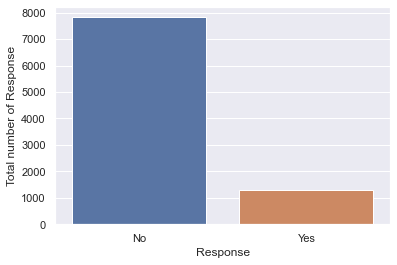

In [233]:
ax = sns.countplot('Response',data = df)
plt.ylabel('Total number of Response')
plt.show()

In [234]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [235]:
#標準化
df_z=df.select_dtypes(exclude = 'object' )
df_n = df.copy()
def normalize(col):
        mu = df[col].mean()
        std = df[col].std()
        z_score = (df[col]-mu)/std
        return z_score

for col in df_z.columns:
    df_n[col] = normalize(col)
df

,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,2763.519279,No,Bachelor,Employed,F,56274,Suburban,Married,0,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Bachelor,Unemployed,F,0,Suburban,Single,0,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Bachelor,Employed,F,48767,Suburban,Married,0,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Bachelor,Unemployed,M,0,Suburban,Married,0,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Bachelor,Employed,M,43836,Rural,Single,0,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Bachelor,Employed,M,71941,Urban,Married,0,Web,Four-Door Car,Medsize
9130,California,3096.511217,Yes,College,Employed,F,21604,Suburban,Divorced,0,Branch,Four-Door Car,Medsize
9131,California,8163.890428,No,Bachelor,Unemployed,M,0,Suburban,Single,3,Branch,Four-Door Car,Medsize
9132,California,7524.442436,No,College,Employed,M,21941,Suburban,Married,0,Branch,Four-Door Car,Large


In [236]:
df_n

,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,-0.762836,No,Bachelor,Employed,F,0.612794,Suburban,Married,-0.422226,Agent,Two-Door Car,Medsize
1,Arizona,-0.149237,No,Bachelor,Unemployed,F,-1.239549,Suburban,Single,-0.422226,Agent,Four-Door Car,Medsize
2,Nevada,0.710597,No,Bachelor,Employed,F,0.365690,Suburban,Married,-0.422226,Agent,Two-Door Car,Medsize
3,California,-0.052260,No,Bachelor,Unemployed,M,-1.239549,Suburban,Married,-0.422226,Call Center,SUV,Medsize
4,Washington,-0.755534,No,Bachelor,Employed,M,0.203379,Rural,Single,-0.422226,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,2.241467,No,Bachelor,Employed,M,1.128497,Urban,Married,-0.422226,Web,Four-Door Car,Medsize
9130,California,-0.714372,Yes,College,Employed,F,-0.528421,Suburban,Divorced,-0.422226,Branch,Four-Door Car,Medsize
9131,California,0.023134,No,Bachelor,Unemployed,M,-1.239549,Suburban,Single,2.873088,Branch,Four-Door Car,Medsize
9132,California,-0.069932,No,College,Employed,M,-0.517328,Suburban,Married,-0.422226,Branch,Four-Door Car,Large


In [237]:
#找離群值
def outlier(col):
    Filter= abs(df_n[col]) <= 3
    return df_n[Filter]


for col in df_z.columns:
    df_n = outlier(col)
df_n

,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,-0.762836,No,Bachelor,Employed,F,0.612794,Suburban,Married,-0.422226,Agent,Two-Door Car,Medsize
1,Arizona,-0.149237,No,Bachelor,Unemployed,F,-1.239549,Suburban,Single,-0.422226,Agent,Four-Door Car,Medsize
2,Nevada,0.710597,No,Bachelor,Employed,F,0.365690,Suburban,Married,-0.422226,Agent,Two-Door Car,Medsize
3,California,-0.052260,No,Bachelor,Unemployed,M,-1.239549,Suburban,Married,-0.422226,Call Center,SUV,Medsize
4,Washington,-0.755534,No,Bachelor,Employed,M,0.203379,Rural,Single,-0.422226,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,2.241467,No,Bachelor,Employed,M,1.128497,Urban,Married,-0.422226,Web,Four-Door Car,Medsize
9130,California,-0.714372,Yes,College,Employed,F,-0.528421,Suburban,Divorced,-0.422226,Branch,Four-Door Car,Medsize
9131,California,0.023134,No,Bachelor,Unemployed,M,-1.239549,Suburban,Single,2.873088,Branch,Four-Door Car,Medsize
9132,California,-0.069932,No,College,Employed,M,-0.517328,Suburban,Married,-0.422226,Branch,Four-Door Car,Large


In [238]:
df = df.loc[df_n.index]

In [239]:
df_n = pd.get_dummies(df_n,drop_first=True)
#get dummy
df_n

,Customer_Lifetime_Value,Income,Number_of_Open_Complaints,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Education_College,Education_Doctor,...,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Vehicle_Size_Medsize,Vehicle_Size_Small
0,-0.762836,0.612794,-0.422226,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-0.149237,-1.239549,-0.422226,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.710597,0.365690,-0.422226,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,-0.052260,-1.239549,-0.422226,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,-0.755534,0.203379,-0.422226,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241467,1.128497,-0.422226,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,-0.714372,-0.528421,-0.422226,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
9131,0.023134,-1.239549,2.873088,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,-0.069932,-0.517328,-0.422226,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [240]:
y = df_n['Response_Yes'] 
X = df_n.drop(columns=['Response_Yes'])

# seperate train and test set
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

In [241]:
test_X.shape

(2180, 30)

In [242]:
# setup model and fit
my_model = RandomForestClassifier(n_estimators=200,random_state=0).fit(train_X, train_y)

In [243]:
print(my_model.score(test_X, test_y, sample_weight=None))

0.978440366972477


In [244]:
#選出前5大重要的feature

feat_labels = train_X.columns
importances = my_model.feature_importances_
print(sum(importances))
indices = np.argsort(importances)[::-1]
for i in range(5):
    print("%2d) %-*s %f" %(i+1, 30, feat_labels[indices[i]], importances[indices[i]]))

1.0
 1) Customer_Lifetime_Value        0.235605
 2) Income                         0.196053
 3) EmploymentStatus_Retired       0.065444
 4) Gender_M                       0.036464
 5) Number_of_Open_Complaints      0.034922


In [245]:
# setup model and fit
my_model = RandomForestRegressor(n_estimators=200,random_state=0).fit(train_X, train_y)
print(my_model.score(test_X, test_y, sample_weight=None))
#選出前5大重要的feature
feat_labels = train_X.columns
importances = my_model.feature_importances_
print(sum(importances))
indices = np.argsort(importances)[::-1]
for i in range(5):
    print("%2d) %-*s %f" %(i+1, 30, feat_labels[indices[i]], importances[indices[i]]))

0.8887665999654994
1.0000000000000002
 1) Customer_Lifetime_Value        0.306744
 2) Income                         0.241928
 3) EmploymentStatus_Retired       0.089953
 4) Gender_M                       0.027166
 5) Number_of_Open_Complaints      0.026313


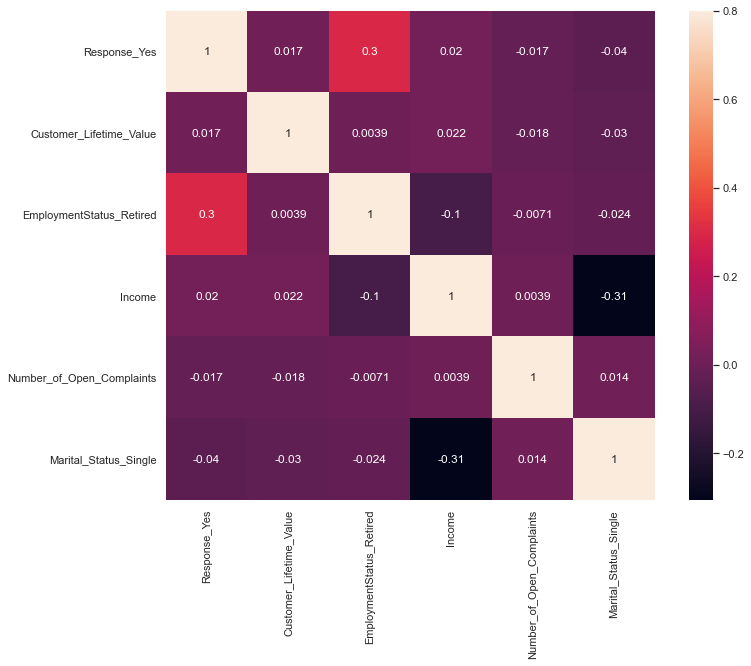

In [246]:
#皮爾森相關
df_person = df_n[['Response_Yes','Customer_Lifetime_Value','EmploymentStatus_Retired','Income','Number_of_Open_Complaints',"Marital_Status_Single"]]

corrmat = df_person.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [247]:
#分配5個feature的權重
sum_import = 0
weight = {}
for i in range(5):
    sum_import += importances[indices[i]]
for j in range(5):
    weight[feat_labels[indices[j]]] = importances[indices[j]]/sum_import

In [248]:
#抓出response_yes的群體，取出他們這5大特徵的分布
df_yes = df[df['Response'] == 'Yes']
df_yes

,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size
5,Oregon,8256.297800,Yes,Bachelor,Employed,F,62902,Rural,Married,0,Web,Two-Door Car,Medsize
6,Oregon,5380.898636,Yes,College,Employed,F,55350,Suburban,Married,0,Agent,Four-Door Car,Medsize
8,Oregon,24127.504020,Yes,Bachelor,Medical Leave,M,14072,Suburban,Divorced,0,Agent,Four-Door Car,Medsize
13,Arizona,8819.018934,Yes,High School or Below,Employed,M,99845,Suburban,Married,1,Branch,SUV,Medsize
22,Arizona,24127.504020,Yes,Bachelor,Medical Leave,M,14072,Suburban,Divorced,0,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107,California,5619.689084,Yes,High School or Below,Unemployed,M,0,Suburban,Married,0,Web,SUV,Medsize
9119,California,5479.555081,Yes,Master,Employed,M,56005,Suburban,Married,1,Branch,Four-Door Car,Small
9122,California,25464.820590,Yes,College,Retired,F,13663,Suburban,Single,0,Branch,Four-Door Car,Small
9123,California,5678.050167,Yes,Bachelor,Unemployed,F,0,Suburban,Married,0,Agent,Four-Door Car,Small


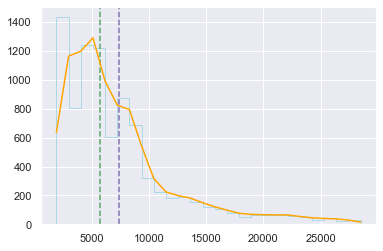

In [249]:
from scipy import stats

ax=df["Customer_Lifetime_Value"]
n, x, _ = plt.hist(ax, histtype='step', bins=25, color='lightblue')
plt.axvline(ax.mean(), c='m', linestyle='--')     # 平均
plt.axvline(ax.median(), c='g', linestyle='--')   # 中位數
density = stats.gaussian_kde(ax)
plt.plot(x, density(x)*10000000, c='orange')

plt.show()


In [250]:
#處理數值型的feature
#取出25%-75%的範圍作為filter
def quantile(col,quan):
    return df_yes[col].quantile(quan)
clv_min = quantile('Customer_Lifetime_Value',0.25)
clv_max = quantile('Customer_Lifetime_Value',0.75)
income_min = quantile('Income',0.25)
income_max = quantile('Income',0.75)
complaints_min = quantile('Number_of_Open_Complaints',0.25)
complaints_max = quantile('Number_of_Open_Complaints',0.75)

In [251]:
#處理類別型的feature
#計算比例分數
g_m = (df_yes[df_yes["Gender"] == "M"].shape[0])/df_yes.shape[0]
g_w = 1- g_m
mar_single = (df_yes[df_yes["Marital_Status"] == "Single"].shape[0])/df_yes.shape[0]
mar_other = 1- mar_single

In [252]:
df_no = df[df['Response'] == 'No']
df_no

,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,2763.519279,No,Bachelor,Employed,F,56274,Suburban,Married,0,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Bachelor,Unemployed,F,0,Suburban,Single,0,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Bachelor,Employed,F,48767,Suburban,Married,0,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Bachelor,Unemployed,M,0,Suburban,Married,0,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Bachelor,Employed,M,43836,Rural,Single,0,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,College,Employed,F,47761,Suburban,Single,0,Branch,Four-Door Car,Large
9129,California,23405.987980,No,Bachelor,Employed,M,71941,Urban,Married,0,Web,Four-Door Car,Medsize
9131,California,8163.890428,No,Bachelor,Unemployed,M,0,Suburban,Single,3,Branch,Four-Door Car,Medsize
9132,California,7524.442436,No,College,Employed,M,21941,Suburban,Married,0,Branch,Four-Door Car,Large


In [253]:
#新增欄位prob_yes
df = df.reindex(columns = df.columns.tolist() + ["prob_yes"])
df_no = df_no.reindex(columns = df_no.columns.tolist() + ["prob_yes"])
df["prob_yes"] = 1

In [254]:
df

,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size,prob_yes
0,Washington,2763.519279,No,Bachelor,Employed,F,56274,Suburban,Married,0,Agent,Two-Door Car,Medsize,1
1,Arizona,6979.535903,No,Bachelor,Unemployed,F,0,Suburban,Single,0,Agent,Four-Door Car,Medsize,1
2,Nevada,12887.431650,No,Bachelor,Employed,F,48767,Suburban,Married,0,Agent,Two-Door Car,Medsize,1
3,California,7645.861827,No,Bachelor,Unemployed,M,0,Suburban,Married,0,Call Center,SUV,Medsize,1
4,Washington,2813.692575,No,Bachelor,Employed,M,43836,Rural,Single,0,Agent,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Bachelor,Employed,M,71941,Urban,Married,0,Web,Four-Door Car,Medsize,1
9130,California,3096.511217,Yes,College,Employed,F,21604,Suburban,Divorced,0,Branch,Four-Door Car,Medsize,1
9131,California,8163.890428,No,Bachelor,Unemployed,M,0,Suburban,Single,3,Branch,Four-Door Car,Medsize,1
9132,California,7524.442436,No,College,Employed,M,21941,Suburban,Married,0,Branch,Four-Door Car,Large,1


In [255]:
def prob(data):
    data['prob_yes'] = 0
    data["prob_yes"][data["Customer_Lifetime_Value"].between(clv_min,clv_max)] += weight["Customer_Lifetime_Value"]*1
    data["prob_yes"][data["EmploymentStatus"] == "Retired"]+= weight["EmploymentStatus_Retired"]*em_retired
    data["prob_yes"][data["EmploymentStatus"] != "Retired"]+= weight["EmploymentStatus_Retired"]*em_other
    data["prob_yes"][data["Income"].between(income_min,income_max)]+= weight["Income"]*1
    data["prob_yes"][data["Number_of_Open_Complaints"].between(complaints_min,complaints_max)]+= weight["Number_of_Open_Complaints"]*1
    data["prob_yes"][data["Gender"] == "M"]+= weight["Gender_M"]*g_m
    data["prob_yes"][data["Gender"] != "M"]+= weight["Gender_M"]*g_w
    

prob(df_no)

<ipython-input-255-919be3cc98df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["prob_yes"][data["Customer_Lifetime_Value"].between(clv_min,clv_max)] += weight["Customer_Lifetime_Value"]*1


In [256]:
#把porb_yes更新到df
df["prob_yes"].loc[df_no.index] = df_no["prob_yes"].loc[df_no.index]
df

C:\Users\40638\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size,prob_yes
0,Washington,2763.519279,No,Bachelor,Employed,F,56274,Suburban,Married,0,Agent,Two-Door Car,Medsize,0.516745
1,Arizona,6979.535903,No,Bachelor,Unemployed,F,0,Suburban,Single,0,Agent,Four-Door Car,Medsize,0.610396
2,Nevada,12887.431650,No,Bachelor,Employed,F,48767,Suburban,Married,0,Agent,Two-Door Car,Medsize,0.516745
3,California,7645.861827,No,Bachelor,Unemployed,M,0,Suburban,Married,0,Call Center,SUV,Medsize,0.610396
4,Washington,2813.692575,No,Bachelor,Employed,M,43836,Rural,Single,0,Agent,Four-Door Car,Medsize,0.516745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Bachelor,Employed,M,71941,Urban,Married,0,Web,Four-Door Car,Medsize,0.167190
9130,California,3096.511217,Yes,College,Employed,F,21604,Suburban,Divorced,0,Branch,Four-Door Car,Medsize,1.000000
9131,California,8163.890428,No,Bachelor,Unemployed,M,0,Suburban,Single,3,Branch,Four-Door Car,Medsize,0.572378
9132,California,7524.442436,No,College,Employed,M,21941,Suburban,Married,0,Branch,Four-Door Car,Large,0.959951


In [257]:
df[df["prob_yes"] == 1]

,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size,prob_yes
5,Oregon,8256.297800,Yes,Bachelor,Employed,F,62902,Rural,Married,0,Web,Two-Door Car,Medsize,1.0
6,Oregon,5380.898636,Yes,College,Employed,F,55350,Suburban,Married,0,Agent,Four-Door Car,Medsize,1.0
8,Oregon,24127.504020,Yes,Bachelor,Medical Leave,M,14072,Suburban,Divorced,0,Agent,Four-Door Car,Medsize,1.0
13,Arizona,8819.018934,Yes,High School or Below,Employed,M,99845,Suburban,Married,1,Branch,SUV,Medsize,1.0
22,Arizona,24127.504020,Yes,Bachelor,Medical Leave,M,14072,Suburban,Divorced,0,Agent,Four-Door Car,Medsize,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107,California,5619.689084,Yes,High School or Below,Unemployed,M,0,Suburban,Married,0,Web,SUV,Medsize,1.0
9119,California,5479.555081,Yes,Master,Employed,M,56005,Suburban,Married,1,Branch,Four-Door Car,Small,1.0
9122,California,25464.820590,Yes,College,Retired,F,13663,Suburban,Single,0,Branch,Four-Door Car,Small,1.0
9123,California,5678.050167,Yes,Bachelor,Unemployed,F,0,Suburban,Married,0,Agent,Four-Door Car,Small,1.0


In [258]:
df_no

,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size,prob_yes
0,Washington,2763.519279,No,Bachelor,Employed,F,56274,Suburban,Married,0,Agent,Two-Door Car,Medsize,0.516745
1,Arizona,6979.535903,No,Bachelor,Unemployed,F,0,Suburban,Single,0,Agent,Four-Door Car,Medsize,0.610396
2,Nevada,12887.431650,No,Bachelor,Employed,F,48767,Suburban,Married,0,Agent,Two-Door Car,Medsize,0.516745
3,California,7645.861827,No,Bachelor,Unemployed,M,0,Suburban,Married,0,Call Center,SUV,Medsize,0.610396
4,Washington,2813.692575,No,Bachelor,Employed,M,43836,Rural,Single,0,Agent,Four-Door Car,Medsize,0.516745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,College,Employed,F,47761,Suburban,Single,0,Branch,Four-Door Car,Large,0.959951
9129,California,23405.987980,No,Bachelor,Employed,M,71941,Urban,Married,0,Web,Four-Door Car,Medsize,0.167190
9131,California,8163.890428,No,Bachelor,Unemployed,M,0,Suburban,Single,3,Branch,Four-Door Car,Medsize,0.572378
9132,California,7524.442436,No,College,Employed,M,21941,Suburban,Married,0,Branch,Four-Door Car,Large,0.959951


In [259]:
df_no["prob_yes"].describe()

count    7458.000000
mean        0.542309
std         0.281298
min         0.040049
25%         0.167190
50%         0.572378
75%         0.610396
max         0.959951
Name: prob_yes, dtype: float64

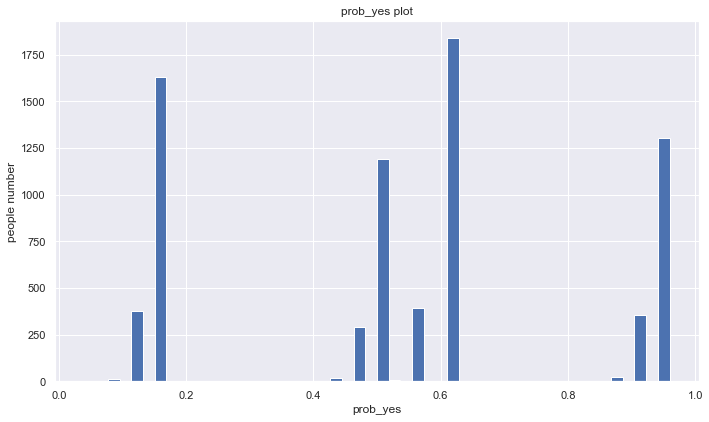

In [260]:
ax=df_no["prob_yes"].plot.hist(bins=50)
ax.set_title("prob_yes plot")#將圖命名
ax.set_xlabel("prob_yes")#將x軸命名
ax.set_ylabel("people number")#將y軸命名
fig=ax.figure#生出圖
fig.set_size_inches(10,6)#圖的大小
fig.tight_layout(pad=1)#自動調整布局
plt.show()#做出圖
#看一下CLV分布s

In [261]:
df = df.reindex(columns = df.columns.tolist() + ["prob_class"])

In [262]:
df["prob_class"][df["prob_yes"] < 0.4] = "c"
df["prob_class"][df["prob_yes"].between(0.4,0.8)] = "b"
df["prob_class"][df["prob_yes"] >0.8] = "a"

<ipython-input-262-59d018f018b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prob_class"][df["prob_yes"] < 0.4] = "c"


In [263]:
df

,State,Customer_Lifetime_Value,Response,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Number_of_Open_Complaints,Sales_Channel,Vehicle_Class,Vehicle_Size,prob_yes,prob_class
0,Washington,2763.519279,No,Bachelor,Employed,F,56274,Suburban,Married,0,Agent,Two-Door Car,Medsize,0.516745,b
1,Arizona,6979.535903,No,Bachelor,Unemployed,F,0,Suburban,Single,0,Agent,Four-Door Car,Medsize,0.610396,b
2,Nevada,12887.431650,No,Bachelor,Employed,F,48767,Suburban,Married,0,Agent,Two-Door Car,Medsize,0.516745,b
3,California,7645.861827,No,Bachelor,Unemployed,M,0,Suburban,Married,0,Call Center,SUV,Medsize,0.610396,b
4,Washington,2813.692575,No,Bachelor,Employed,M,43836,Rural,Single,0,Agent,Four-Door Car,Medsize,0.516745,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Bachelor,Employed,M,71941,Urban,Married,0,Web,Four-Door Car,Medsize,0.167190,c
9130,California,3096.511217,Yes,College,Employed,F,21604,Suburban,Divorced,0,Branch,Four-Door Car,Medsize,1.000000,a
9131,California,8163.890428,No,Bachelor,Unemployed,M,0,Suburban,Single,3,Branch,Four-Door Car,Medsize,0.572378,b
9132,California,7524.442436,No,College,Employed,M,21941,Suburban,Married,0,Branch,Four-Door Car,Large,0.959951,a


In [264]:
df["prob_class"].value_counts()
#CLV最高的是Oregon

b    3745
a    2948
c    2025
Name: prob_class, dtype: int64